In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image #for importing the photos for comparison
import os
import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
df_SXS_data = pd.read_csv('Compare/SXS_hMlR_data.csv')       #Lambda = 588
df_Whisky_data = pd.read_csv('Compare/Whisky_ALF2_data.csv') #Lambda = 591
df_THC_data = pd.read_csv('Compare/THC_BLh_data.csv')        #Lambda = 594
df_SACRA_data = pd.read_csv('Compare/SACRA_H_data.csv')      #Lambda = 607
df_BAM_data = pd.read_csv('Compare/BAM_MPA1_data.csv')       #Lambda = 609

Dominant Frequency across the entire time series: 2855.0453449853917 Hz


2855.0453449853917

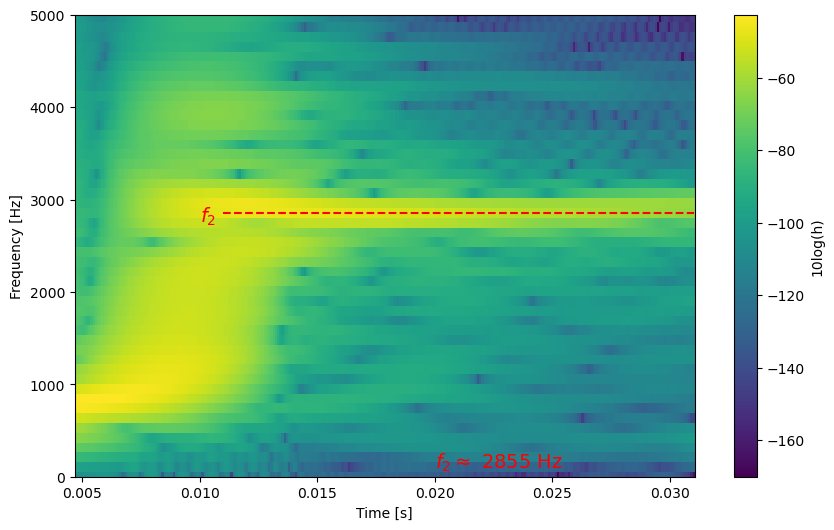

In [3]:
def compute_dominant_frequency(df, time_column, data_column, fmax=6000, nfft=600, overlap_percent=99):
    # Extract the data and time from the DataFrame
    data = df[data_column].to_numpy()
    time_s = df[time_column].to_numpy()
    
    # Compute average timestep
    avg_dt = np.mean(np.diff(time_s))
    
    # Define parameters for the spectrogram
    fs = 1 / avg_dt  # Sampling frequency
    noverlap = int(overlap_percent * nfft // 100)  # Overlap between segments
    
    # Compute the spectrogram for the entire time series
    Pxx, freqs, bins = plt.mlab.specgram(data, NFFT=nfft, Fs=fs, noverlap=noverlap)
    
    # Limit the spectrogram to the fmax range
    freq_mask = freqs <= fmax
    Pxx = Pxx[freq_mask, :]
    freqs = freqs[freq_mask]
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(bins, freqs, 10 * np.log10(Pxx), shading='auto', cmap='viridis')
    plt.colorbar().set_label('10log(h)')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.ylim(0, fmax)
#    plt.title(f'Spectrogram for the full time series and 0 to {fmax}Hz')
    
    # Find the dominant frequency by identifying the frequency with the maximum total power
    total_power_per_frequency = np.sum(Pxx, axis=1)  # Sum power over all time bins for each frequency
    dominant_freq_index = np.argmax(total_power_per_frequency)  # Index of the frequency with max power
    dominant_frequency = freqs[dominant_freq_index]  # The dominant frequency

    #Make Labels
    f2 = dominant_frequency
    label_span = np.linspace(0.011,bins[-1], 50)
    plt.plot(label_span, [f2 for i in range(len(label_span))], linestyle='dashed',color = 'red')
    plt.text(0.01, f2-100, r'$f_2$', color='red', fontsize=14)
    plt.text(0.02,100, r'$f_2 \approx$'+f" {round(f2)} Hz", color='red', fontsize=14)
    
    # Print and return the dominant frequency
    print(f"Dominant Frequency across the entire time series: {dominant_frequency} Hz")
    
    return dominant_frequency

# Example usage:
fmax = 5000  # Limit the frequency to the relevant range

# Assuming df_data is your DataFrame with the signal data
compute_dominant_frequency(df_THC_data, 'time_sec', 'Real_h', fmax=fmax)

Dominant Frequency across the entire time series: 0.0 Hz


0.0

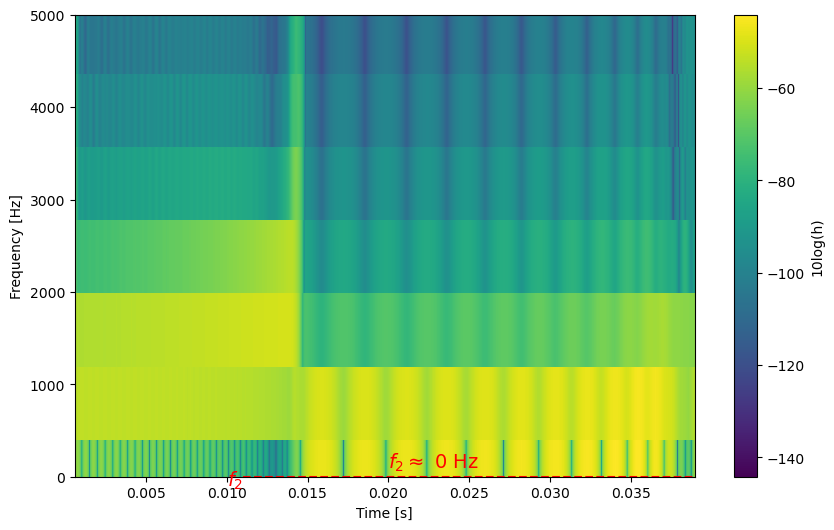

In [4]:
compute_dominant_frequency(df_SXS_data, 'time_sec', 'Real_h', fmax=fmax)

Dominant Frequency across the entire time series: 0.0 Hz


0.0

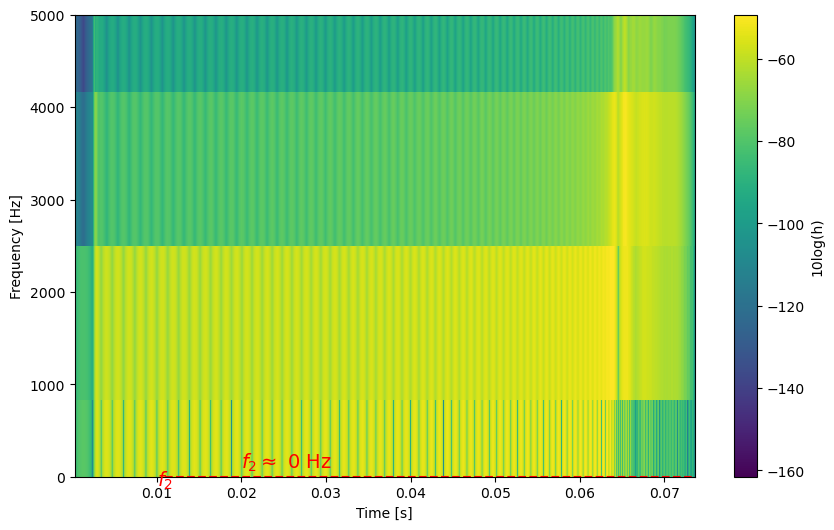

In [5]:
compute_dominant_frequency(df_SACRA_data, 'time_sec', 'Real_h', fmax=fmax)

Dominant Frequency across the entire time series: 687.7558478811458 Hz


687.7558478811458

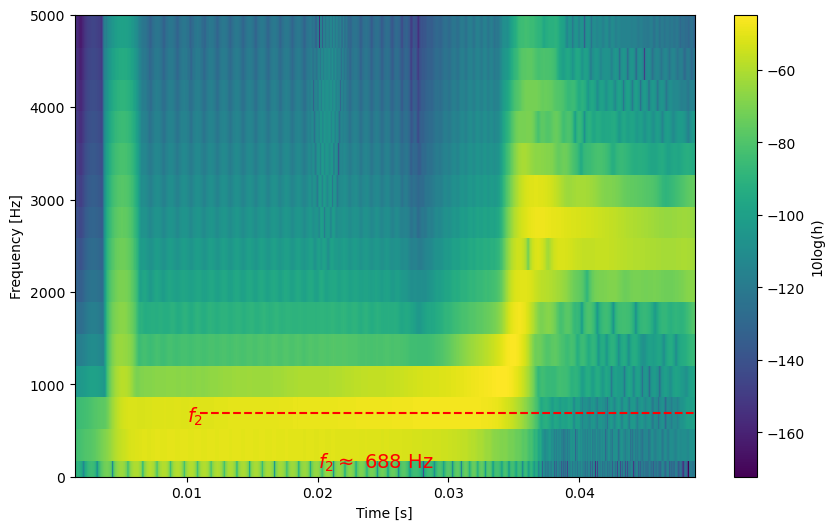

In [6]:
compute_dominant_frequency(df_BAM_data, 'time_sec', 'Real_h', fmax=fmax)

Dominant Frequency across the entire time series: 805.6565347401472 Hz


805.6565347401472

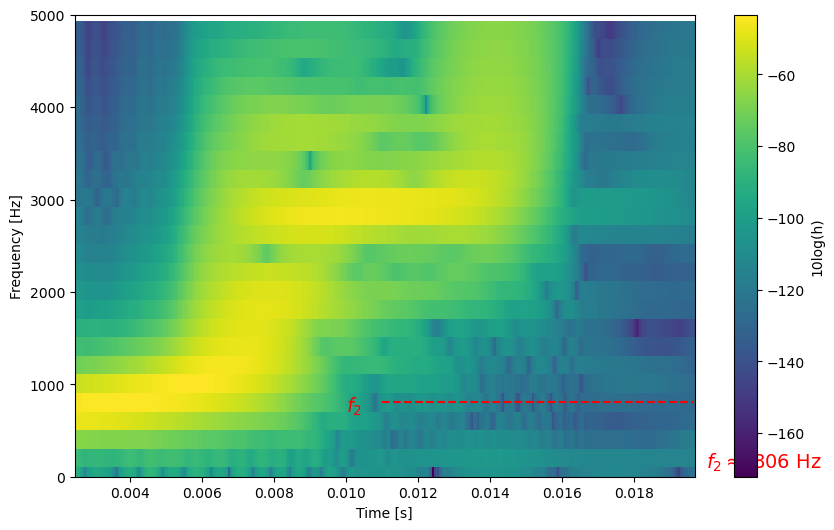

In [7]:
compute_dominant_frequency(df_Whisky_data, 'time_sec', 'Real_h', fmax=fmax)

In [8]:
def check_power_distribution(df, time_column, data_column, fmax=5000, nfft=500, overlap_percent=99):
    # Extract the data and time from the DataFrame
    data = df[data_column].to_numpy()
    time_s = df[time_column].to_numpy()
    
    # Compute average timestep
    avg_dt = np.mean(np.diff(time_s))
    
    # Define parameters for the spectrogram
    fs = 1 / avg_dt  # Sampling frequency
    noverlap = int(overlap_percent * nfft // 100)  # Overlap between segments
    
    # Compute the spectrogram
    Pxx, freqs, bins = plt.mlab.specgram(data, NFFT=nfft, Fs=fs, noverlap=noverlap)
    
    # Limit the spectrogram to the fmax range
    freq_mask = freqs <= fmax
    Pxx = Pxx[freq_mask, :]
    freqs = freqs[freq_mask]
    
    # Print the power distribution across frequencies
    total_power_per_frequency = np.sum(Pxx, axis=1)  # Sum power over all time bins for each frequency
    print("Total power per frequency (first 10 frequencies):", total_power_per_frequency[:10])
    
    return total_power_per_frequency

# Use the function on both datasets
check_power_distribution(df_THC_data, 'time_sec', 'Real_h', fmax=5000)
check_power_distribution(df_BAM_data, 'time_sec', 'Real_h', fmax=5000)

Total power per frequency (first 10 frequencies): [4.40746084e-09 3.01644885e-08 3.98594802e-07 3.99576375e-06
 1.67712778e-05 2.98746666e-04 1.79145609e-03 2.21259483e-03
 1.21081995e-03 8.64044045e-04]
Total power per frequency (first 10 frequencies): [8.62960689e-04 1.06419463e-02 1.16217756e-02 3.05778175e-03
 1.03475830e-03 7.17839014e-04 1.65842295e-03 1.86057194e-03
 2.61845923e-04 9.83802680e-06]


array([8.62960689e-04, 1.06419463e-02, 1.16217756e-02, 3.05778175e-03,
       1.03475830e-03, 7.17839014e-04, 1.65842295e-03, 1.86057194e-03,
       2.61845923e-04, 9.83802680e-06, 5.79705580e-06, 1.20733334e-06,
       1.86269533e-07])

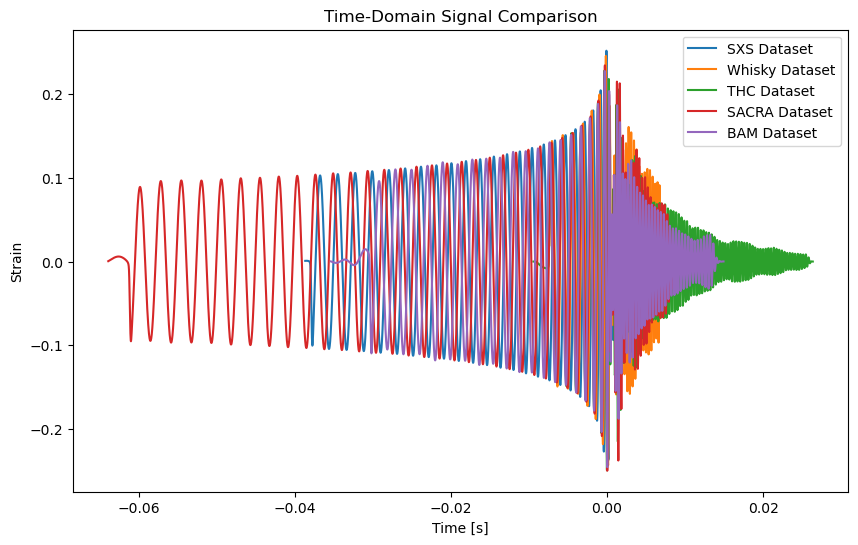

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_SXS_data['time_sec'], df_SXS_data['Real_h'], label='SXS Dataset')
plt.plot(df_Whisky_data['time_sec'], df_Whisky_data['Real_h'], label='Whisky Dataset')
plt.plot(df_THC_data['time_sec'], df_THC_data['Real_h'], label='THC Dataset')
plt.plot(df_SACRA_data['time_sec'], df_SACRA_data['Real_h'], label='SACRA Dataset')
plt.plot(df_BAM_data['time_sec'], df_BAM_data['Real_h'], label='BAM Dataset')
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.legend()
plt.title('Time-Domain Signal Comparison')
plt.show()

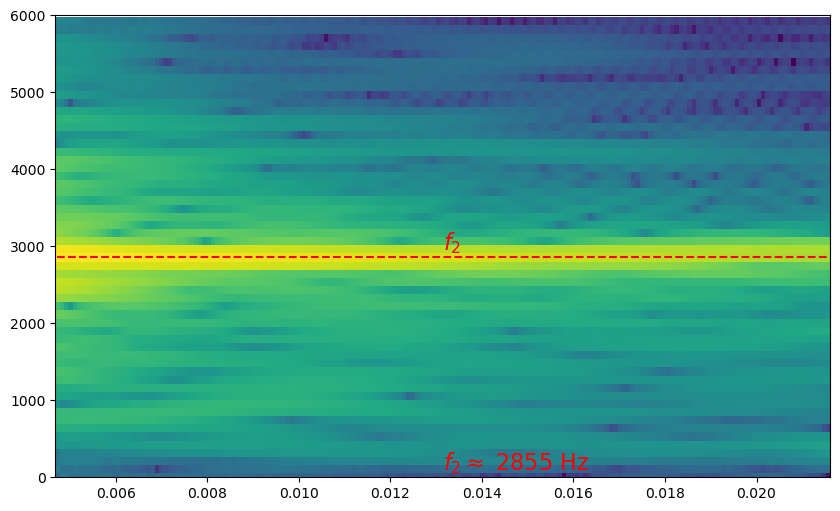

In [51]:
def compute_dominant_frequency_post_t0(df, time_column='time_sec', data_column='Real_h', t_start=0, fmax=6000, nfft=600, overlap_percent=99, ax=None):
    # Extract the data and time from the DataFrame
    data = df[data_column].to_numpy()
    time_s = df[time_column].to_numpy()
    
    # Focus on data where t >= t_start
    time_mask = time_s >= t_start
    data_post_t0 = data[time_mask]
    time_post_t0 = time_s[time_mask]
    
    # Compute average timestep
    avg_dt = np.mean(np.diff(time_post_t0))
    
    # Define parameters for the spectrogram
    fs = 1 / avg_dt  # Sampling frequency
    noverlap = int(overlap_percent * nfft // 100)  # Overlap between segments
    
    # Compute the spectrogram
    Pxx, freqs, bins = plt.mlab.specgram(data_post_t0, NFFT=nfft, Fs=fs, noverlap=noverlap)
    
    # Limit the spectrogram to the fmax range
    freq_mask = freqs <= fmax
    Pxx = Pxx[freq_mask, :]
    freqs = freqs[freq_mask]

    # Plot the spectrogram on the specified axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Create new figure if no axis is provided
    
    # Plot the spectrogram
    ax.pcolormesh(bins, freqs, 10 * np.log10(Pxx), shading='auto', cmap='viridis')
    ax.set_ylim(0, fmax)
    # plt.colorbar().set_label('10log(h)')
    # plt.xlabel('Time [s]', fontsize=14)
    # plt.ylabel('Frequency [Hz]', fontsize=14)
    # plt.title(f'Spectrogram for t >= {t_start} and 0 to {fmax}Hz')
    
    # Find the dominant frequency by identifying the frequency with the maximum total power
    total_power_per_frequency = np.sum(Pxx, axis=1)  # Sum power over all time bins for each frequency
    dominant_freq_index = np.argmax(total_power_per_frequency)  # Index of the frequency with max power
    dominant_frequency = freqs[dominant_freq_index]  # The dominant frequency

    #Make Labels
    f2 = dominant_frequency
    label_span = np.linspace(bins[0], bins[-1], 50)  # Spanning time axis for the dashed line
    ax.plot(label_span, [f2 for _ in range(len(label_span))], linestyle='dashed',color = 'red')
    # Center the text in the middle of the time axis
    time_center = (bins[0] + bins[-1]) / 2
    ax.text(time_center, f2 + 100, r'$f_2$', color='red', fontsize=16)
    ax.text(time_center, 100, r'$f_2 \approx$' + f" {round(f2)} Hz", color='red', fontsize=16)

    # Print and return the dominant frequency
    #print(f"Sampling Frequency (Hz): {fs} seconds") 
    #print(f"Dominant Frequency for t >= {t_start}: {dominant_frequency} Hz")
    
    return dominant_frequency

# Example usage for both datasets:
fmax = 6000  # Maximum frequency to display

# Assuming df_first and df_second are your DataFrames
dominant_frequency_THC = compute_dominant_frequency_post_t0(df_THC_data, nfft=600)

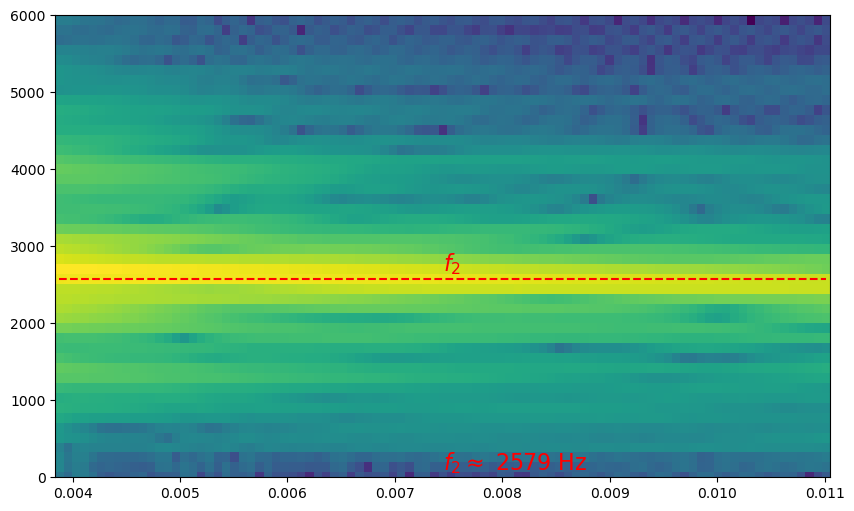

In [52]:
# Try different nfft and overlap values
#nfft_values = [400, 600, 800, 1000]
#overlap_values = [80, 90, 99]

#for nfft in nfft_values:
#    for overlap in overlap_values:
#        print(f"Testing with nfft = {nfft}, overlap = {overlap}%")
#        compute_dominant_frequency_post_t0(df_BAM_data, 'time_sec', 'Real_h', fmax=5000, nfft=nfft, overlap_percent=overlap)
dominant_frequency_BAM = compute_dominant_frequency_post_t0(df_BAM_data, nfft=1600)

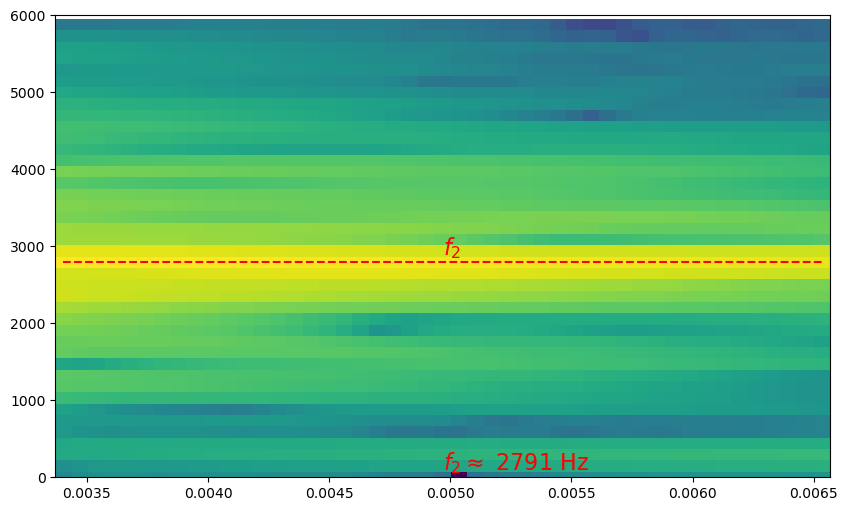

In [53]:
dominant_frequency_SACRA = compute_dominant_frequency_post_t0(df_SACRA_data, nfft=6800)

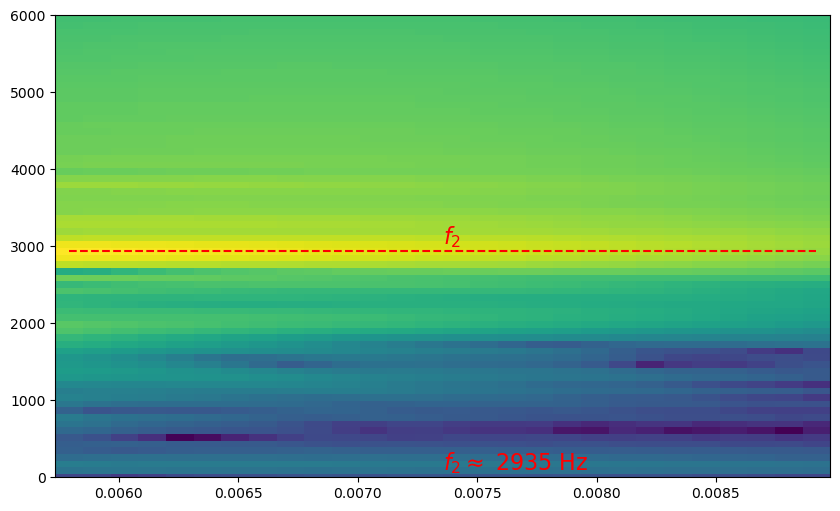

In [54]:
dominant_frequency_Whisky = compute_dominant_frequency_post_t0(df_Whisky_data, nfft=1400)

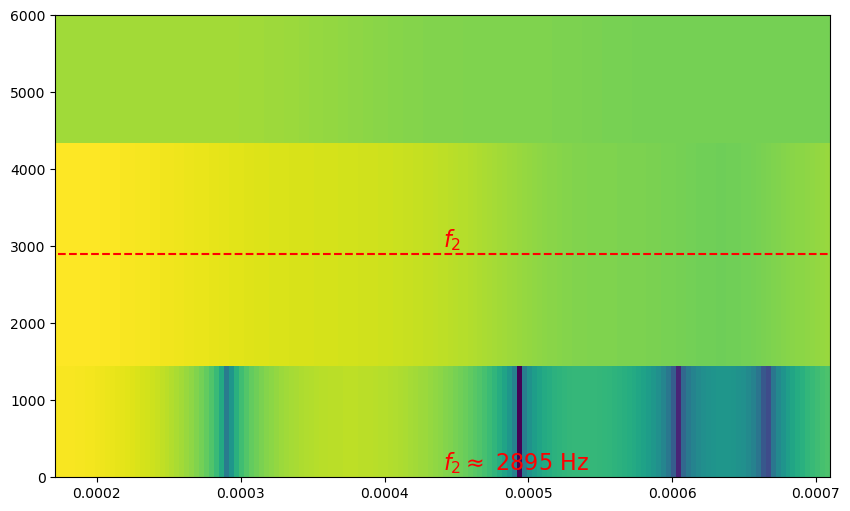

In [84]:
dominant_frequency_SXS = compute_dominant_frequency_post_t0(df_SXS_data, nfft=700)

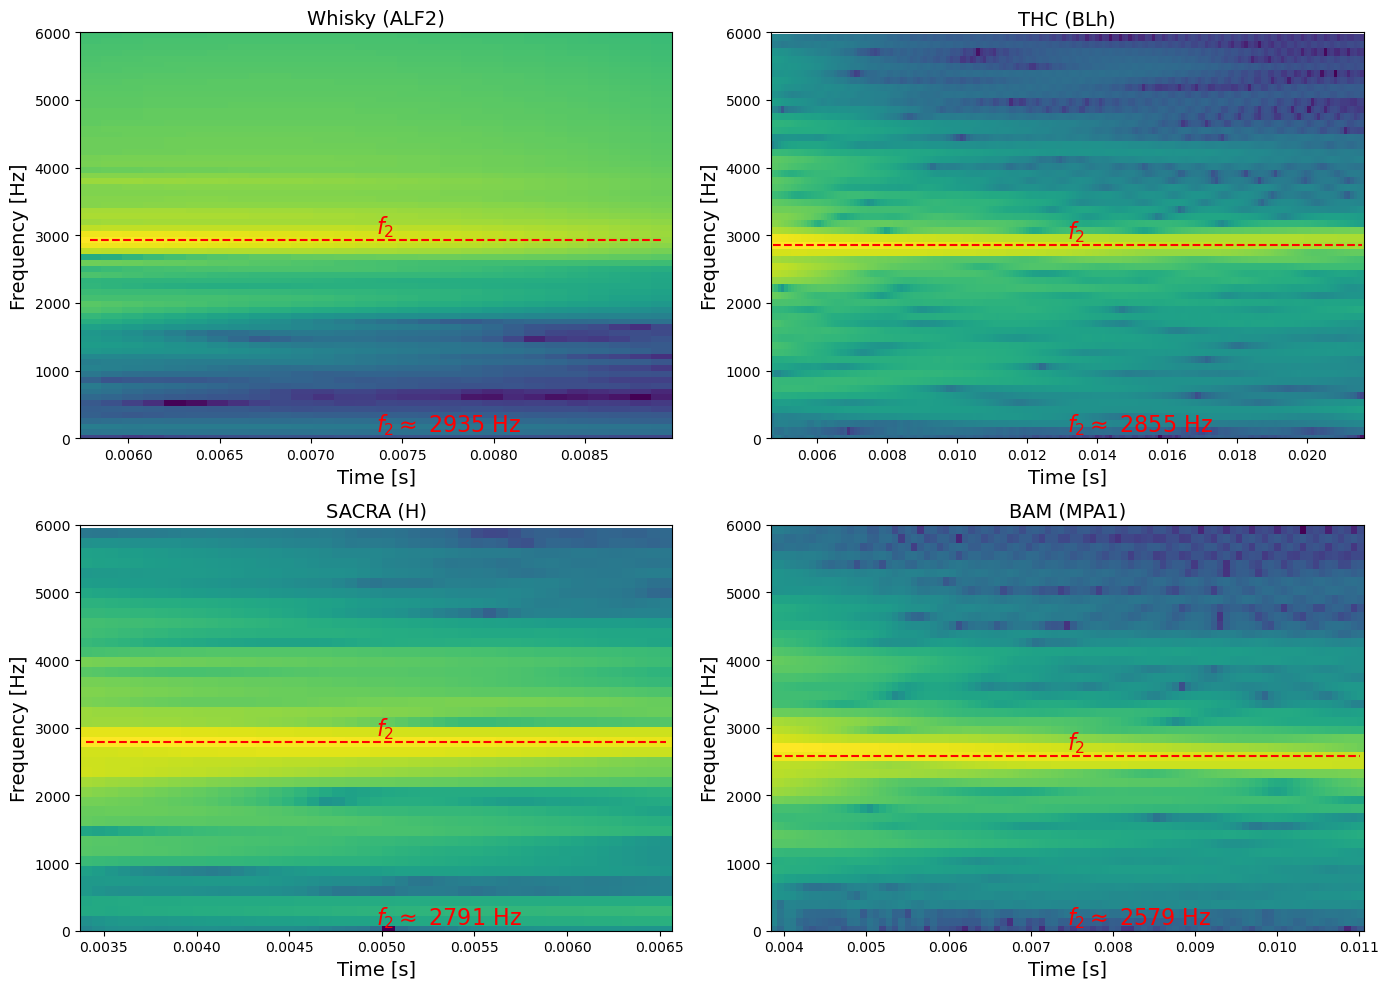

In [56]:
def plot_2x2_grid(df_1, df_2, df_3, df_4, nfft_values):
    # Create 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    
    # Plot for each dataset
    datasets = [df_Whisky_data, df_THC_data, df_SACRA_data, df_BAM_data]
    titles = ['Whisky (ALF2)', 'THC (BLh)', 'SACRA (H)', 'BAM (MPA1)']
    
    # Loop over axes and datasets
    for ax, df, title, nfft in zip(axs.flat, datasets, titles, nfft_values):
        # Call the plotting function for each dataset
        dominant_frequency = compute_dominant_frequency_post_t0(df, nfft=nfft, ax=ax)
        
        # Set title and axis labels
        ax.set_title(f"{title}", fontsize=14)
        ax.set_xlabel('Time [s]', fontsize=14)
        ax.set_ylabel('Frequency [Hz]', fontsize=14)

    # Save the plot as a PDF or PNG
    #plt.savefig('spectrogram_2x2_grid.png', dpi=300)  # Save as PNG
    plt.savefig('spectrogram_2x2_grid.pdf', dpi=300, format='pdf')
    
    # Adjust spacing between plots
    plt.tight_layout()
    
    # Show the final grid of plots
    plt.show()

# Example usage for the 2x2 grid plot
#fmax = 6000  # Maximum frequency for the y-axis
nfft_values = [1400, 600, 6800, 1600]  # Different nfft values for each plot
plot_2x2_grid(df_Whisky_data, df_THC_data, df_SACRA_data, df_BAM_data, nfft_values)